# Problem set 3
#### Abbot & Selden, Weds March 18

**Description:**  Estimating nitrate concentrations from BGC Argo float data using a model based on the JMA
repeat hydrography data.
This assignment builds on the in-class work we did this week building a model to predict nitrate
concentrations in the North West Pacific from the Japan Meteorological Association repeat
hydrography data (‘JMA_nitrate.csv’). In groups, you built a model using either MLPRegressor
or KNN, and have done a sensitivity assessment to find the best set of model parameters
(either layers/nodes or n nearest neighbours) to predict your test data.

## I. Building the MLP regressor model

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss

In [13]:
# Import the JMA dataset - used to build model
infile = "../Data/jma_nitrate.csv"
df = pd.read_csv(infile)
df.columns

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')

In [16]:
# Use depth, sal and temp as predictors
X = df[df.nitrate > 0].drop(['Unnamed: 0', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density','nitrate'], axis = 1)
y = df.nitrate[df.nitrate > 0]

print(np.shape(X))
print(np.shape(y))

X.head()

(15574, 3)
(15574,)


,theta,sal,depth
0,25.8807,34.0215,0
3,25.9894,34.2936,51
4,23.6146,34.5002,75
5,20.0183,34.7358,100
6,16.5906,34.6531,126


In [17]:
# split dataset in train and test data (80:20)
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 4) # this split function is random

# Save this info to visualize test data later
X_test_depth = X_test.depth

# shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(12459, 3)
(3115, 3)


In [18]:
# scale the training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Import the necessary modules and libraries
from sklearn.neural_network import MLPRegressor
from sklearn import metrics 

####

string = np.arange(1,6,1) # The number of times it'll loop through hidden layers
string2 = np.arange(1,6,1) # The number of times it'll loop through nodes
startingnodecount = 4 # starting node number
nodes = startingnodecount
hls = [nodes,] # starting hidden layer number

OutFileName = "../Calculations/PredictingNO3_20200303_AccuracyScores.csv"
OutFile = open(OutFileName, 'w')
header = "layers,nodes,rsquared,mse\n"
OutFile.write(header)

for i in string:
    for i in string2:   
        mlp = MLPRegressor(hidden_layer_sizes = (hls), activation='tanh', max_iter = 2500, random_state = 4)  
        mlp.fit(X_train,y_train)
        y_pred = mlp.predict(X_test)
        score = metrics.r2_score(y_test,y_pred)
        mse = metrics.mean_squared_error(y_test,y_pred)
        layers = len(hls)
        Outputstring = "%i,%i,%f,%f" % (layers,nodes,score,mse)
        OutFile.write(Outputstring+"\n")
        print("layers: %i, nodes: %i, rsquared: %f, mse:%f" % (layers,nodes,score,mse))
        hls.append(nodes, ) 
    nodes = nodes + 2
    hls = [nodes,]
          
OutFile.close()

# Open file to ensure everything looks kosher
pd.read_csv(OutFileName).head(10)

layers: 1, nodes: 4, rsquared: 0.984564, mse:3.674821
layers: 2, nodes: 4, rsquared: 0.985875, mse:3.362787
layers: 3, nodes: 4, rsquared: 0.988372, mse:2.768387
layers: 4, nodes: 4, rsquared: 0.986085, mse:3.312735
layers: 5, nodes: 4, rsquared: 0.988017, mse:2.852724
layers: 1, nodes: 6, rsquared: 0.987711, mse:2.925732
layers: 2, nodes: 6, rsquared: 0.990011, mse:2.378005
layers: 3, nodes: 6, rsquared: 0.990095, mse:2.358007
layers: 4, nodes: 6, rsquared: 0.990306, mse:2.307795
layers: 5, nodes: 6, rsquared: 0.990227, mse:2.326573
layers: 1, nodes: 8, rsquared: 0.988028, mse:2.850254
layers: 2, nodes: 8, rsquared: 0.990244, mse:2.322521
layers: 3, nodes: 8, rsquared: 0.990450, mse:2.273521
layers: 4, nodes: 8, rsquared: 0.990639, mse:2.228563
layers: 5, nodes: 8, rsquared: 0.990514, mse:2.258350
layers: 1, nodes: 10, rsquared: 0.987909, mse:2.878609
layers: 2, nodes: 10, rsquared: 0.990681, mse:2.218583
layers: 3, nodes: 10, rsquared: 0.990965, mse:2.150935
layers: 4, nodes: 10, rsq

,layers,nodes,rsquared,mse
0,1,4,0.984564,3.674821
1,2,4,0.985875,3.362787
2,3,4,0.988372,2.768387
3,4,4,0.986085,3.312735
4,5,4,0.988017,2.852724
5,1,6,0.987711,2.925732
6,2,6,0.990011,2.378005
7,3,6,0.990095,2.358007
8,4,6,0.990306,2.307795
9,5,6,0.990227,2.326573


Text(0.5, 1.0, 'Test data true vs. predicted')

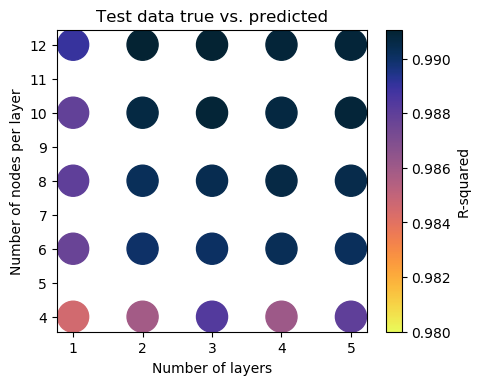

In [21]:
import cmocean

infile = "../Calculations/PredictingNO3_20200303_AccuracyScores.csv"
scores = pd.read_csv(infile)

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)
palette = 'cmo.thermal_r'

plt.scatter(scores.layers,scores.nodes, c = scores.rsquared, cmap = palette, s = 500, vmin = .98)
cb = plt.colorbar()

ax.set_xlabel('Number of layers')
ax.set_ylabel('Number of nodes per layer')
cb.set_label('R-squared')

ax.set_title('Test data true vs. predicted')

Text(0.5, 1.0, 'Test data true vs. predicted')

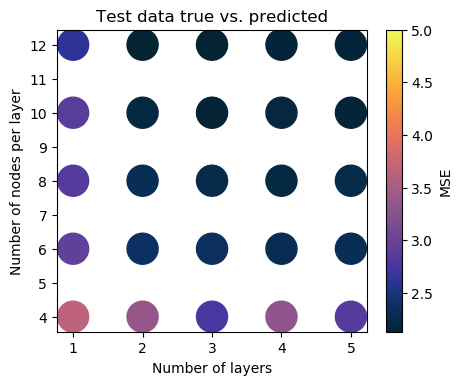

In [22]:
import cmocean

infile = "../Calculations/PredictingNO3_20200303_AccuracyScores.csv"
scores = pd.read_csv(infile)

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)
palette = 'cmo.thermal'

plt.scatter(scores.layers,scores.nodes, c = scores.mse, cmap = palette, s = 500, vmax = 5)
cb = plt.colorbar()

ax.set_xlabel('Number of layers')
ax.set_ylabel('Number of nodes per layer')
cb.set_label('MSE')

ax.set_title('Test data true vs. predicted')

R^2 score (training data): 0.9910949867200128


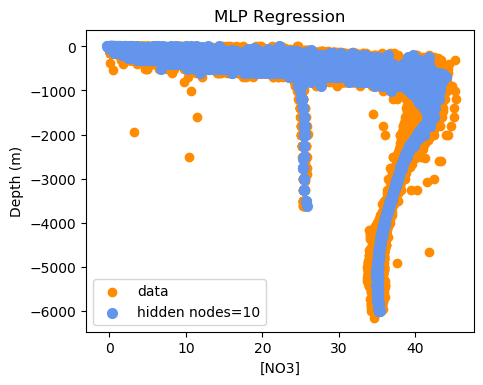

TEST DATA:  slope: 0.984286    intercept: 0.494749     r_squared: 0.990590      p_value: 0.000000


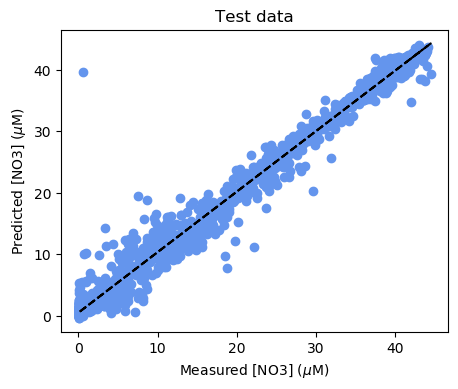

In [23]:
n  = 10

# Import the necessary modules and libraries
from sklearn.neural_network import MLPRegressor

# Fit regression model
regr_1 = MLPRegressor(hidden_layer_sizes=(n,n,n), activation='tanh', max_iter=10000)
regr_1.fit(X_train, y_train)
print("R^2 score (training data): {}".format(regr_1.score(X_train,y_train)))

# Predict
y_1 = regr_1.predict(X_test)

# Plot 1:  Depth profile
fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)
plt.scatter(y, -X.depth, c="darkorange", label="data")
plt.scatter(y_1, -X_test_depth, color="cornflowerblue", label="hidden nodes="+str(n), linewidth=2)
plt.xlabel("[NO3]")
plt.ylabel("Depth (m)")
plt.title("MLP Regression")
plt.legend()
plt.show()

## Plot 2:  Test data--predictive capability
fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)

plt.xlabel('Measured [NO3] (${\mu}$M)')
plt.ylabel('Predicted [NO3] (${\mu}$M)')
plt.title('Test data')

slope, intercept, r_value, p_value, std_err = ss.linregress(y_test,y_1)
print("TEST DATA:  slope: %f    intercept: %f     r_squared: %f      p_value: %f" % (slope, intercept, r_value**2, p_value))

plt.scatter(y_test,y_1, c='cornflowerblue')

y_pred = slope*y_test + intercept
plt.plot(y_test,y_pred, 'k', linestyle = '--')

## II. Problem set 3
### 1. Assess overlap between datasets
Before you apply your model, assess the level of overlap between the range of
environmental conditions represented in the JMA and BGC Argo data sets. Compare
the geographical extent, depth range, water masses, seasonal coverage and any other
factors that you think could be pertinent between the two data sets. Describe
similarities and highlight differences.

In [24]:
# Import the BCG Argo dataset - we will predict NO3 values for this dataset
infile = "../Data/Kuro_BGCargo_NO3.csv"
df2 = pd.read_csv(infile)
df2.columns

Index(['Date/GMT', 'Days since 1/1/1900', 'NITRATE[uMOL/KG]', 'DEPTH[M]',
       'PRESSURE[DBAR]', 'NA', 'SALINITY[PSS]', 'TEMPERATURE[C]',
       'SIGMATHETA[KG/M3]', 'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'],
      dtype='object')

### 1.a. Compare the geographical extent

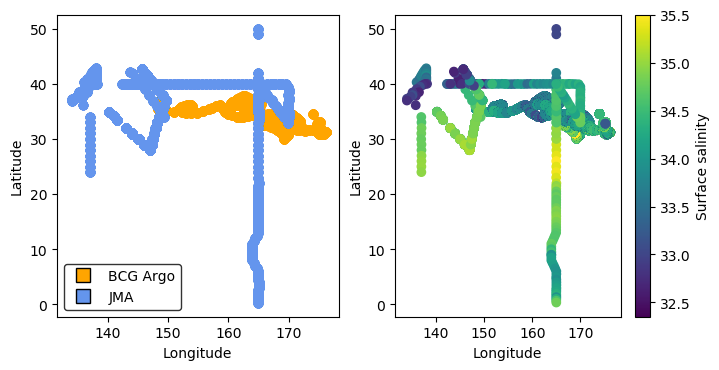

In [314]:
fig, (ax, ax2) =  plt.subplots(1, 2, figsize = (8, 4), dpi = 100)

ax.scatter(df2.LON,df2.LAT, color = "orange")
ax.scatter(df.lon,df.lat, color = "cornflowerblue")

ax.legend((line1, line2), ('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'lower left')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

df_sfc = df[df.depth < 1]
df2_sfc = df2[df2['DEPTH[M]'] < 1]

plt.scatter(df2_sfc.LON,df2_sfc.LAT, c = df2_sfc['SALINITY[PSS]'])
plt.scatter(df_sfc.lon,df_sfc.lat, c = df_sfc.sal)

ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

cb = plt.colorbar()
cb.set_label("Surface salinity")

The BCH Argo dataset falls reasonably well within the geographic range of the JMA dataset, although it extends a bit farther east.

### 1.b. Compare the depth range

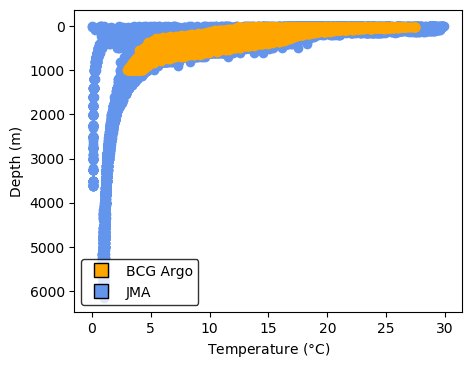

In [62]:
fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)

ax.scatter(df.theta,df.depth, color = "cornflowerblue")
ax.scatter(df2['TEMPERATURE[C]'],-df2['DEPTH[M]'], color = "orange")
ax.legend((line1, line2), ('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'lower left')
ax.set_xlabel('Temperature ($\degree$C)')
ax.set_ylabel('Depth (m)')
plt.gca().invert_yaxis()

The Argo data fall within the depth range of the JMA dataset.

### 1.c. Compare the water masses

In [272]:
# To make a ts plot...
import gsw
def ts_plot(): 
    # Figure out boudaries (mins and maxs)
    smin = sal.min() - (0.01 * sal.min())
    smax = sal.max() + (0.01 * sal.max())
    tmin = temp.min() - (0.1 * temp.max())
    tmax = temp.max() + (0.1 * temp.max())

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))

    # # Create temp and sal vectors of appropiate dimensions
    si = np.arange(np.min(sal),np.max(sal),0.01) # adjust last number to adjust # of bins (grid resolution)
    ti = np.arange(np.min(temp),np.max(temp),0.1) # adjust last number to adjust # of bins (grid resolution)

    # Create empty grid of zeros
    dens = np.zeros((len(ti),len(si)),dtype = 'int')

    # Loop to fill in grid with densities
    for j in range(0,len(ti)):
        for i in range(0, len(si)):
            dens[j,i]=gsw.rho(si[i],ti[j],0)

    # Substract 1000 to convert to sigmat
    dens = dens - 1000
    
    # Make plot
    fig, (ax) =  plt.subplots(1, 1, figsize = (5, 3), dpi = 450, sharex = 'all')

    CS = plt.contour(si,ti,dens,[20,21,22,23,24,25,26,27],linestyles = 'dotted', linewidths = 1, colors='k')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level

    plt.subplots_adjust(right=0.92, bottom=0.18)

    ax.set_xlabel('Salinity')
    ax.set_ylabel('Temperature ($\degree$C)')

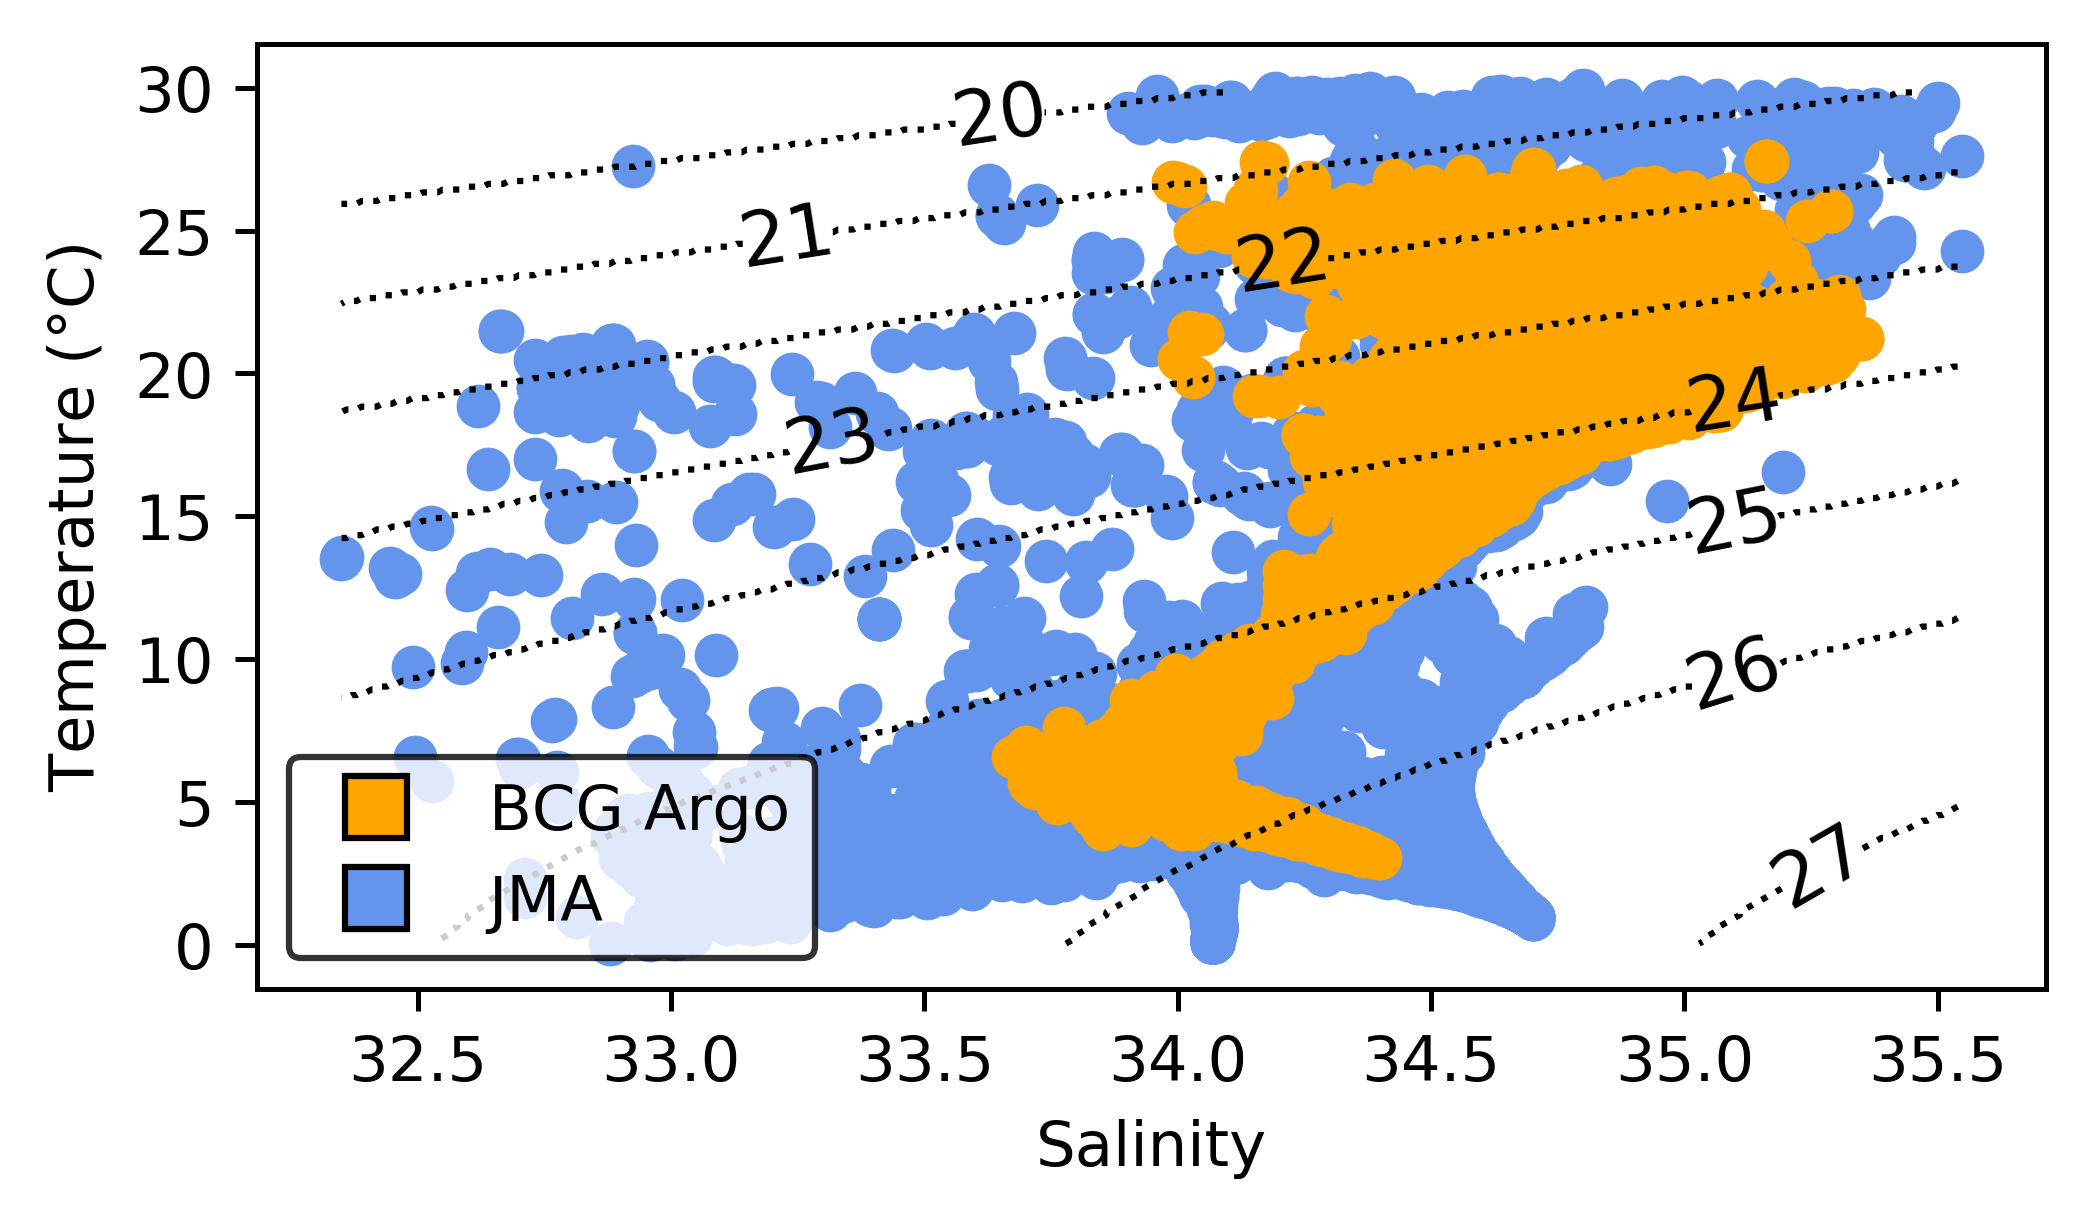

In [270]:
sal = df.sal
temp = df.theta
ts_plot()

plt.scatter(df.sal,df.theta, c = "cornflowerblue")
plt.scatter(df2['SALINITY[PSS]'],df2['TEMPERATURE[C]'], c = "orange")
plt.legend((line1, line2), ('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'lower left')

The Argo data are within the same water masses as the JMA data.

### 1.d. Compare the seasonal coverage

(2010.75, 2017.25)

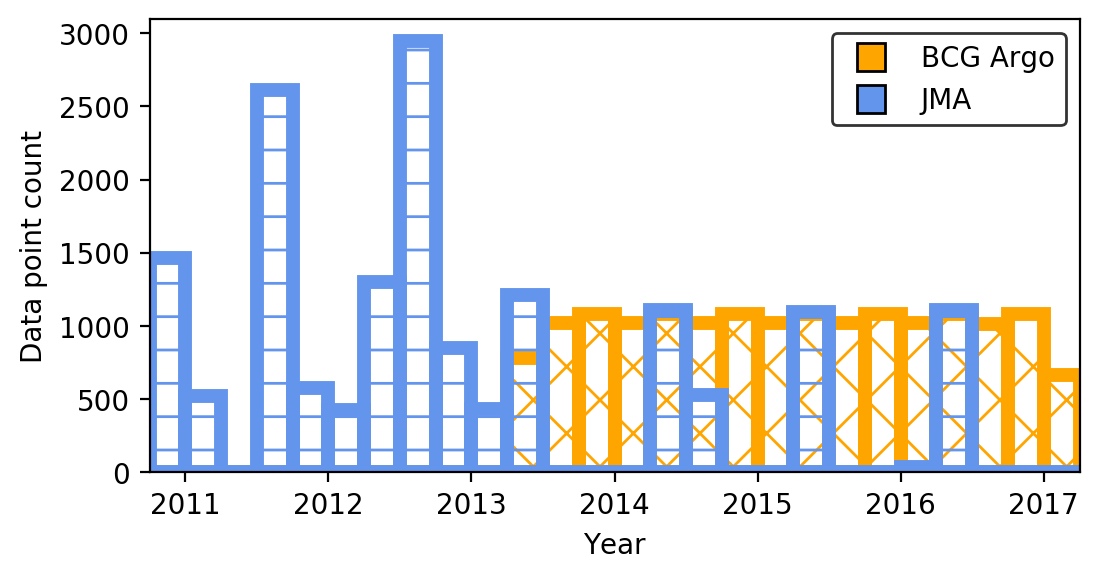

In [146]:
fig, (ax) =  plt.subplots(1, 1, figsize = (6, 3), dpi = 200)

jma_dayssince = ((df.year - 1900)*364.75) + (df.month*(364.75/12)) + df.day

bins = np.arange(2010,2018,0.25)

plt.hist(1900+df2['Days since 1/1/1900']/364.75, edgecolor = "orange", lw = 5, facecolor = "None", bins = bins, hatch = 'X')
plt.hist(1900+jma_dayssince/364.75, edgecolor = "cornflowerblue", facecolor = "None", lw = 5, bins = bins, hatch = '-')

ax.set_xlabel('Year')
ax.set_ylabel('Data point count')
ax.legend((line1, line2), ('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'upper right')
ax.set_xticks(np.arange(2010,2019,1))
ax.set_xlim([2010.75,2017.25])

In [159]:
maxmo = np.max(df.month[df.year > 2013])
minmo = np.min(df.month[df.year > 2013])
print("After 2013, when BCG Argo data collection began, JMA data were collected only between months %i and %i." % (minmo,maxmo))
print("BCG Argo were collected continuously between 2013 and 2017. The training dataset thus lacks the seasonality of the dataset for which NO3 is to be predicted.")

After 2013, when BCG Argo data collection began, JMA data were collected only between months 2 and 6.
BCG Argo were collected continuously between 2013 and 2017. The training dataset thus lacks the seasonality of the dataset for which NO3 is to be predicted.


Overall, the training dataset (JMA) has good representative coverage for predicting [NO3] from the BCG Argo dataset. However, JMA data collection was seasonal (collection occurs in spring) during the years that BCG Argo data occurred. Argo data collection was continuous, so the model may fail to accurately reproduce summer to winter [NO3] in surface waters where nutrients typically display strong seasonality.

### 2.  Apply the model to the BGC Argo data
Apply your model to the BGC Argo data to estimate nitrate concentrations based on
your input variables (e.g. temperature, salinity, etc…).

In [211]:
argo = df2.drop(['Date/GMT', 'Days since 1/1/1900', 'PRESSURE[DBAR]', 'NA', 'SIGMATHETA[KG/M3]', 'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'], axis = 1)

OutFileName = "../Calculations/argo_cleaned.csv"
OutFile = open(OutFileName, 'w')
OutFile.write("theta,sal,depth,no3\n")

line = np.arange(0,len(argo),1)
for i in line:
    depth = -1* argo['DEPTH[M]'].loc[i]
    sal = argo['SALINITY[PSS]'].loc[i]
    theta = argo['TEMPERATURE[C]'].loc[i]
    no3 = argo['NITRATE[uMOL/KG]'].loc[i]
    OutputString = "%f,%f,%f,%f" % (theta,sal,depth,no3)
    OutFile.write(OutputString + "\n")
OutFile.close()

df3 = pd.read_csv(OutFileName)
df3.columns 

Index(['theta', 'sal', 'depth', 'no3'], dtype='object')

In [234]:
X_argo = df3.drop(['no3'],axis = 1)
X_argo = scaler.transform(X_argo)

y_argo = df3.no3

y_argo_new = []
for i in y_argo:
    if i < 0:
        i = 0
    else:
        i = i
    y_argo_new.append(i)

print(np.shape(X_argo))
print(np.shape(y_argo_new))

(16136, 3)
(16136,)


In [218]:
# Predict
y_1 = regr_1.predict(X_argo)

### 3. Compare predicted and observed Argo data
Compare the observed BGC Argo nitrate to your predicted values. Report the r 2 score
and RMSE (root mean squared error). Does your model perform consistently well, or are
there any noticeable outliers? If there are, identify those data points and suggest
reasons why you think that your model performs less well for those points.

slope: 0.909280, intercept: 1.258619, r_squared: 0.979291, p_value: 0.000000, rmse: 2.105283


Text(0.5, 0, '[NO3]')

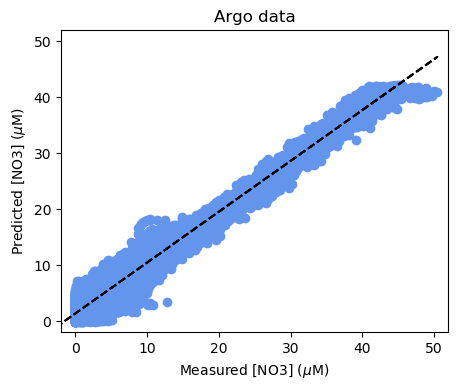

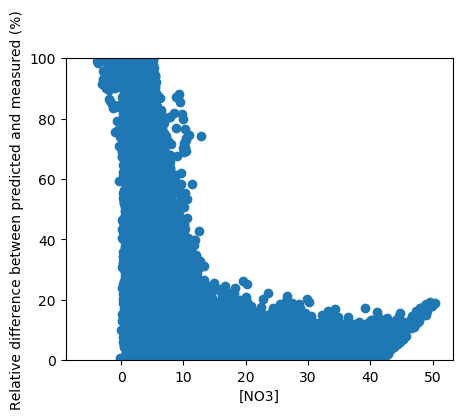

In [322]:
fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)

plt.xlabel('Measured [NO3] (${\mu}$M)')
plt.ylabel('Predicted [NO3] (${\mu}$M)')
plt.title('Argo data')

slope, intercept, r_value, p_value, std_err = ss.linregress(y_argo_new,y_1)
rmse = metrics.mean_squared_error(y_argo_new,y_1, squared = False)
print("slope: %f, intercept: %f, r_squared: %f, p_value: %f, rmse: %f" % (slope, intercept, r_value**2, p_value, rmse))

plt.scatter(y_argo_new,y_1, c='cornflowerblue')

y_pred = slope*y_argo + intercept
plt.plot(y_argo,y_pred, 'k', linestyle = '--')

ax.set_xlim([-2,52])
ax.set_ylim([-2,52])

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)

diff = 100*np.abs((y_argo - y_1)/y_argo)
plt.scatter(y_argo,diff)
ax.set_ylim([0,100])
ax.set_ylabel('Relative difference between predicted and measured (%)')
ax.set_xlabel('[NO3]')

The model slightly underestimates [NO3] i.e., the slope is below 1 (~0.90). This is particularly true at high nitrate concentrations (>45 uM). These values are observed in deeper, higher density waters (see below); however, similar waters are represented in the jma dataset. Most of these high nitrate values in the Argo dataset were observed ~1000 m from late 2015 to early 2016. This was off-cycle with the jma sampling, so it is likely that jma data failed to capture this deep, higher NO3 water mass.

When considering the relative difference between measured and predicted values, the model performs poorly at low NO3 concentrations (< 10 uM). This may be partially explained by the inclusion of values that are clearly below the detection limit (e.g., negative values); however, nitrate values > 1 uM are detectable with most methods. This poor performance may also be due in part to two other factors. (1) Lower nitrate concentrations are typically observed in surface waters and surface waters  show greater seasonality. As discussed above, the training dataset failed to capture the seasonal range of the Argo data. (2) Nutrient concentrations in surface waters can be strongly affected by biological activity. This variability is not captured in the model, which uses only physical parameters to estimate nitrate.

### Additional figures ... where are these high [NO3] data points that are poorly resolved by the model?

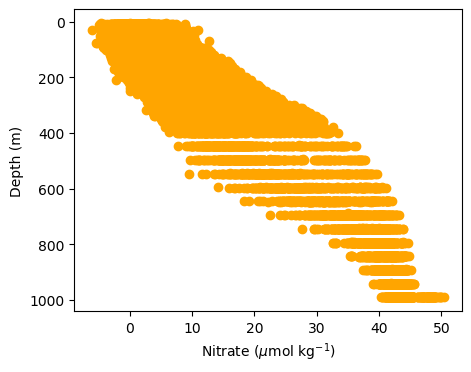

In [259]:
fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)

plt.scatter(df2['NITRATE[uMOL/KG]'],-df2['DEPTH[M]'], color = "orange")
plt.xlabel('Nitrate (${\mu}$mol kg$^{-1}$)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

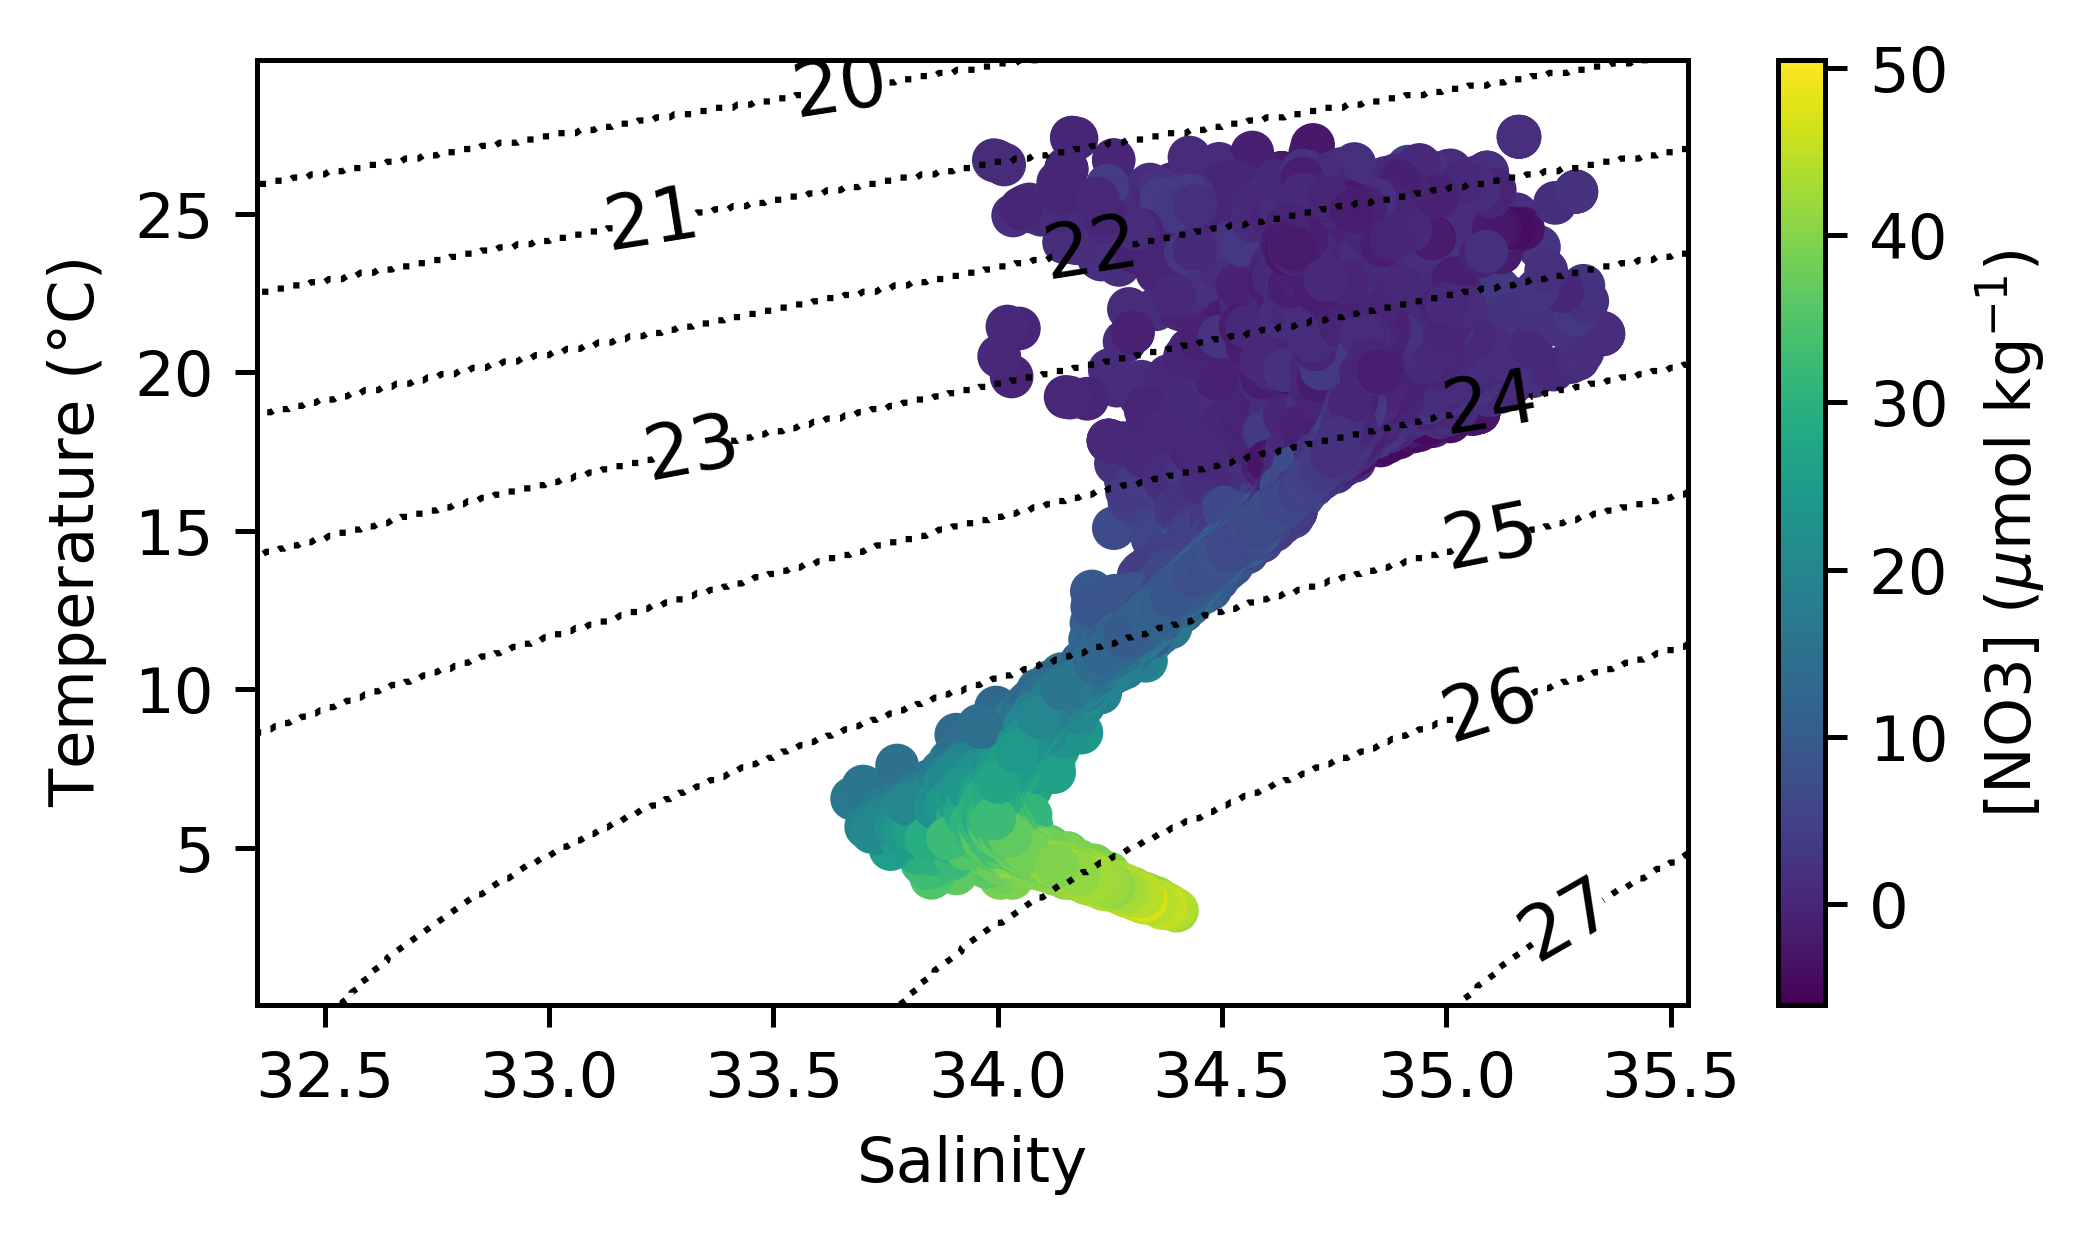

In [274]:
sal = df.sal
temp = df.theta
ts_plot()

plt.scatter(df2['SALINITY[PSS]'],df2['TEMPERATURE[C]'], c = df2['NITRATE[uMOL/KG]'])
cb = plt.colorbar()
cb.set_label('[NO3] (${\mu}$mol kg$^{-1}$)')


Text(0, 0.5, 'Count of nitrate values > 45 umol/kg')

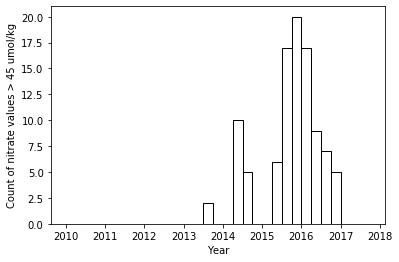

In [285]:
outliers = df2[df2['NITRATE[uMOL/KG]'] > 45]

bins = np.arange(2010,2018,0.25)
plt.hist(1900+outliers['Days since 1/1/1900']/364.75, bins = bins, facecolor = "None", edgecolor = "k")
plt.xlabel('Year')
plt.ylabel('Count of nitrate values > 45 umol/kg')

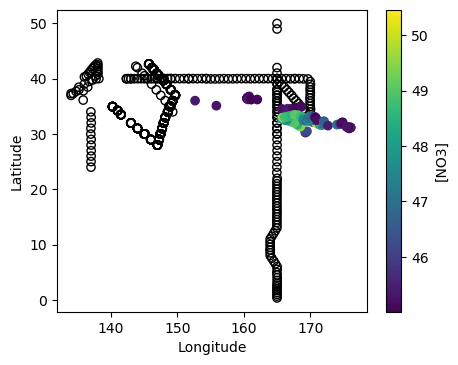

In [301]:
fig, (ax2) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)

plt.scatter(df_sfc.lon,df_sfc.lat, c = "None", edgecolor = "k")
plt.scatter(outliers.LON,outliers.LAT, c = outliers['NITRATE[uMOL/KG]'])

ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

cb = plt.colorbar()
cb.set_label("[NO3]")